# TRANSFER LEARNING

***Develop a CNN model with 2 convolutional layers and 25% dropouts using Brain Tumor Images dataset.***

Dataset: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset

### Preparing the Dataset

In [ ]:
!unzip archive.zip

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
import warnings

In [2]:
train_set = keras.preprocessing.image_dataset_from_directory(
    'brain-tumor-mri-dataset/Training',
    seed=123,
    interpolation='nearest',
    batch_size=32,
    image_size=(256,256)
)

Found 5712 files belonging to 4 classes.


In [3]:
test_set = keras.preprocessing.image_dataset_from_directory(
    'brain-tumor-mri-dataset/Testing',
    seed=123,
    interpolation='nearest',
    batch_size=32,
    image_size=(256,256)
)

Found 1311 files belonging to 4 classes.


In [4]:
class_names = train_set.class_names
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


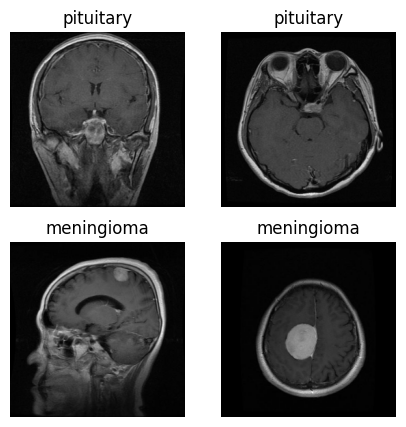

In [5]:
plt.figure(figsize=(5,5))
for img, label in train_set.take(1):
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(img[i])
        plt.title(class_names[label[i]])
        plt.axis('off')

<hr>

### Simple CNN Model (with Dropout)

- Model Building and Compilation with Dropout

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(layers.Dropout(0.25))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      31,490,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,510,084 (120.20 MB)

 Trainable params: 31,510,084 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

- Model Training

In [7]:
epochs = 5
history = model.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

loss, accuracy = model.evaluate(test_set)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 38s 171ms/step - accuracy: 0.6679 - loss: 96.6710 - val_accuracy: 0.8886 - val_loss: 0.4214
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.9292 - loss: 0.2525 - val_accuracy: 0.9291 - val_loss: 0.2529
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.9787 - loss: 0.0730 - val_accuracy: 0.9375 - val_loss: 0.2623
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 110ms/step - accuracy: 0.9940 - loss: 0.0254 - val_accuracy: 0.9375 - val_loss: 0.2790
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 16s 84ms/step - accuracy: 0.9927 - loss: 0.0277 - val_accuracy: 0.9283 - val_loss: 0.4520
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.9400 - loss: 0.5763
Test Loss: 0.452044814825058
Test Accuracy: 0.9282990097999573


<hr>

### Transfer Learning - Strategy 1 (Freezing all Layers)

- Loading the base model (**RESNET 50**)

In [13]:
base_model = keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3)
)

for layer in base_model.layers:
    layer.trainable = False

- Simply adding output layers to existing model

In [15]:
from keras.optimizers import Adam

model_transfer_freeze = models.Sequential()
model_transfer_freeze.add(base_model)
model_transfer_freeze.add(layers.Flatten())
# model_transfer_freeze.add(layers.Dense(256, activation='relu'))
model_transfer_freeze.add(layers.Dense(4, activation='softmax'))

model_transfer_freeze.compile(optimizer=Adam(learning_rate = 0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_transfer_freeze.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 8, 8, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │         524,292 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,112,004 (91.98 MB)

 Trainable params: 524,292 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [16]:
epochs = 5
history_transfer_freeze = model_transfer_freeze.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

loss_transfer_freeze, accuracy_transfer_freeze = model_transfer_freeze.evaluate(test_set)
print(f"Transfer Learning Test Loss: {loss_transfer_freeze}")
print(f"Transfer Learning Test Accuracy: {accuracy_transfer_freeze}")

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 39s 174ms/step - accuracy: 0.7933 - loss: 6.2508 - val_accuracy: 0.9184 - val_loss: 1.2881
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 30s 125ms/step - accuracy: 0.9566 - loss: 0.7159 - val_accuracy: 0.9375 - val_loss: 1.4317
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - accuracy: 0.9649 - loss: 0.7571 - val_accuracy: 0.9588 - val_loss: 0.7451
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 125ms/step - accuracy: 0.9881 - loss: 0.2121 - val_accuracy: 0.9641 - val_loss: 0.9765
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - accuracy: 0.9841 - loss: 0.2851 - val_accuracy: 0.9405 - val_loss: 2.3890
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.9462 - loss: 2.3869
Transfer Learning Test Loss: 2.389028787612915
Transfer Learning Test Accuracy: 0.9405034184455872


<hr>

### Transfer Learning - Strategy 2 (Adding customized layers, unfrezzing layers and Fine-Tuning)

- Using **RESNET 50** as the base model

In [10]:
base_model = keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3)
)

for layer in base_model.layers:
    layer.trainable = False


for layer in base_model.layers[:9]:
    layer.trainable = True

- New model on top of the base model with very small learning rate

In [11]:
from keras.optimizers import Adam

model_transfer = models.Sequential()
model_transfer.add(base_model)
model_transfer.add(layers.Flatten())
model_transfer.add(layers.Dense(128, activation='relu'))
model_transfer.add(layers.Dropout(0.25))
model_transfer.add(layers.Dense(4, activation='softmax'))

model_transfer.compile(optimizer=Adam(learning_rate =1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_transfer.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 8, 8, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,365,572 (153.98 MB)

 Trainable params: 16,791,748 (64.06 MB)

 Non-trainable params: 23,573,824 (89.93 MB)

- Hybrid model Training

In [12]:
epochs = 5
history_transfer = model_transfer.fit(
    train_set,
    validation_data=test_set,
    epochs=epochs
)

loss_transfer, accuracy_transfer = model_transfer.evaluate(test_set)
print(f"Transfer Learning Test Loss: {loss_transfer}")
print(f"Transfer Learning Test Accuracy: {accuracy_transfer}")

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 89s 392ms/step - accuracy: 0.7343 - loss: 0.8045 - val_accuracy: 0.8169 - val_loss: 0.4233
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 102s 235ms/step - accuracy: 0.9248 - loss: 0.1897 - val_accuracy: 0.9039 - val_loss: 0.2361
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 236ms/step - accuracy: 0.9659 - loss: 0.0942 - val_accuracy: 0.9542 - val_loss: 0.1319
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 81s 233ms/step - accuracy: 0.9832 - loss: 0.0511 - val_accuracy: 0.9634 - val_loss: 0.1022
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 82s 236ms/step - accuracy: 0.9880 - loss: 0.0372 - val_accuracy: 0.9664 - val_loss: 0.0889
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9794 - loss: 0.0684
Transfer Learning Test Loss: 0.08889838308095932
Transfer Learning Test Accuracy: 0.966437816619873


<hr>

### Evaluation of the models

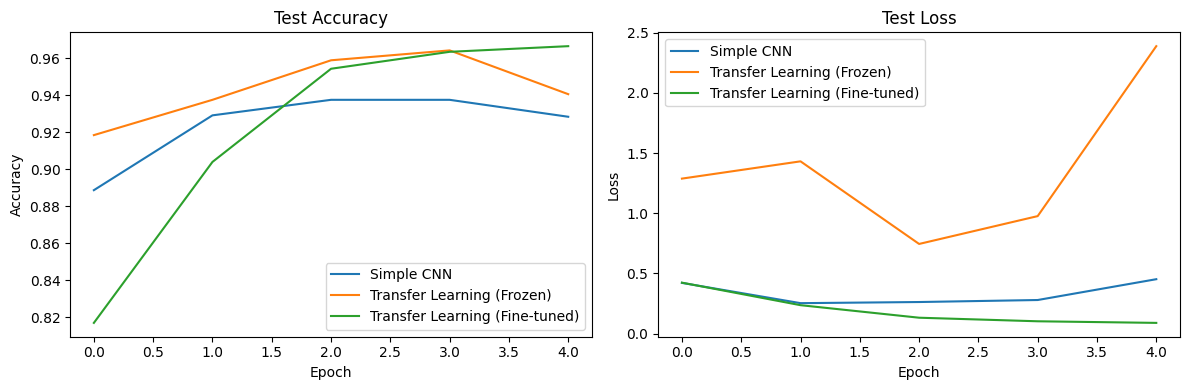

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['val_accuracy'], label='Simple CNN')
plt.plot(history_transfer_freeze.history['val_accuracy'], label='Transfer Learning (Frozen)')
plt.plot(history_transfer.history['val_accuracy'], label='Transfer Learning (Fine-tuned)')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='Simple CNN')
plt.plot(history_transfer_freeze.history['val_loss'], label='Transfer Learning (Frozen)')
plt.plot(history_transfer.history['val_loss'], label='Transfer Learning (Fine-tuned)')
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

<hr><hr>